In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt



# Discovering

In [2]:
raw_data = pd.read_csv('Lightning Strike(2018).csv')
raw_data.head(10)

,date,number_of_strikes,x_coord,y_coord
0,2012-09-15,2,-68.8,49.5
1,2012-09-15,2,-85.7,22.8
2,2012-09-15,2,-95.6,25.8
3,2012-09-15,2,-79.5,26.0
4,2012-09-15,2,-88.7,29.1
5,2012-09-15,2,-72.0,47.2
6,2012-09-15,2,-85.9,22.7
7,2012-09-15,2,-71.5,47.6
8,2012-09-15,2,-109.4,28.7
9,2012-09-15,2,-113.4,27.8


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12875911 entries, 0 to 12875910
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   date               object 
 1   number_of_strikes  int64  
 2   x_coord            float64
 3   y_coord            float64
dtypes: float64(2), int64(1), object(1)
memory usage: 392.9+ MB


In [4]:
raw_data.describe(include='all')

,date,number_of_strikes,x_coord,y_coord
count,12875911,1.287591e+07,1.287591e+07,1.287591e+07
unique,1443,NaN,NaN,NaN
top,2015-06-30,NaN,NaN,NaN
freq,32369,NaN,NaN,NaN
mean,NaN,1.098200e+01,-9.135266e+01,3.426069e+01
std,NaN,2.538748e+01,1.330062e+01,7.461390e+00
min,NaN,1.000000e+00,-1.418000e+02,1.660000e+01
25%,NaN,1.000000e+00,-1.017000e+02,2.860000e+01
50%,NaN,3.000000e+00,-9.120000e+01,3.410000e+01
75%,NaN,1.000000e+01,-8.130000e+01,3.980000e+01


In [5]:
raw_data.shape

(12875911, 4)

In [6]:
raw_data['date'] = pd.to_datetime(raw_data['date'])

In [7]:
# raw_data['date'].dt.strftime('%Y-W%V')

In [8]:
# raw_data.info(), raw_data.head()

In [9]:
# raw_data.groupby(by='number_of_strikes').sum()

In [10]:
sample_data = raw_data.sample(100000)

In [11]:
sample_data.head(), sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 2393422 to 12733561
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   date               100000 non-null  datetime64[ns]
 1   number_of_strikes  100000 non-null  int64         
 2   x_coord            100000 non-null  float64       
 3   y_coord            100000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 3.8 MB


(               date  number_of_strikes  x_coord  y_coord
 2393422  2015-04-25                  8    -94.5     40.0
 7637305  2018-07-13                 15    -81.5     31.9
 4003847  2018-07-21                 45   -104.7     38.7
 9303981  2018-05-20                  3    -79.8     34.4
 11197832 2018-05-15                  6    -92.4     36.4,
 None)

### Datetime Manipulation

In [12]:
sample_data['Week'] = sample_data['date'].dt.strftime('%Y-W%V')
sample_data['Month'] = sample_data['date'].dt.strftime('%Y-%m')
sample_data['Quarter'] = sample_data['date'].dt.to_period('Q').dt.strftime('%Y-Q%q')
sample_data['Year'] = sample_data['date'].dt.strftime('%Y')
sample_data.head(10)

,date,number_of_strikes,x_coord,y_coord,Week,Month,Quarter,Year
2393422,2015-04-25,8,-94.5,40.0,2015-W17,2015-04,2015-Q2,2015
7637305,2018-07-13,15,-81.5,31.9,2018-W28,2018-07,2018-Q3,2018
4003847,2018-07-21,45,-104.7,38.7,2018-W29,2018-07,2018-Q3,2018
9303981,2018-05-20,3,-79.8,34.4,2018-W20,2018-05,2018-Q2,2018
11197832,2018-05-15,6,-92.4,36.4,2018-W20,2018-05,2018-Q2,2018
3433909,2018-03-22,4,-63.1,41.0,2018-W12,2018-03,2018-Q1,2018
919902,2018-12-19,7,-89.0,28.3,2018-W51,2018-12,2018-Q4,2018
12314466,2009-06-19,278,-87.6,42.9,2009-W25,2009-06,2009-Q2,2009
9839177,2012-08-03,1,-102.1,47.2,2012-W31,2012-08,2012-Q3,2012
1864360,2009-04-03,3,-88.5,35.8,2009-W14,2009-04,2009-Q2,2009


### Grouping and Visualising

In [13]:
# data = sample_data.groupby(sample_data['date'].dt.year == '2018')

In [14]:
df = sample_data.copy()
df_by_week_2018 = df[df['Year'] == '2018'].groupby(df['Week']).sum(numeric_only=True).reset_index()

In [15]:
df_by_week_2018

,Week,number_of_strikes,x_coord,y_coord
0,2018-W01,153,-3559.5,1293.8
1,2018-W02,2962,-16332.9,5442.2
2,2018-W03,255,-3971.4,1561.4
3,2018-W04,2920,-17004.0,6185.2
4,2018-W05,132,-2516.4,809.8
5,2018-W06,3747,-12290.8,4123.7
6,2018-W07,413,-3860.1,1453.8
7,2018-W08,11805,-27167.3,9729.8
8,2018-W09,822,-6703.8,2645.1
9,2018-W10,1381,-14759.6,5399.0


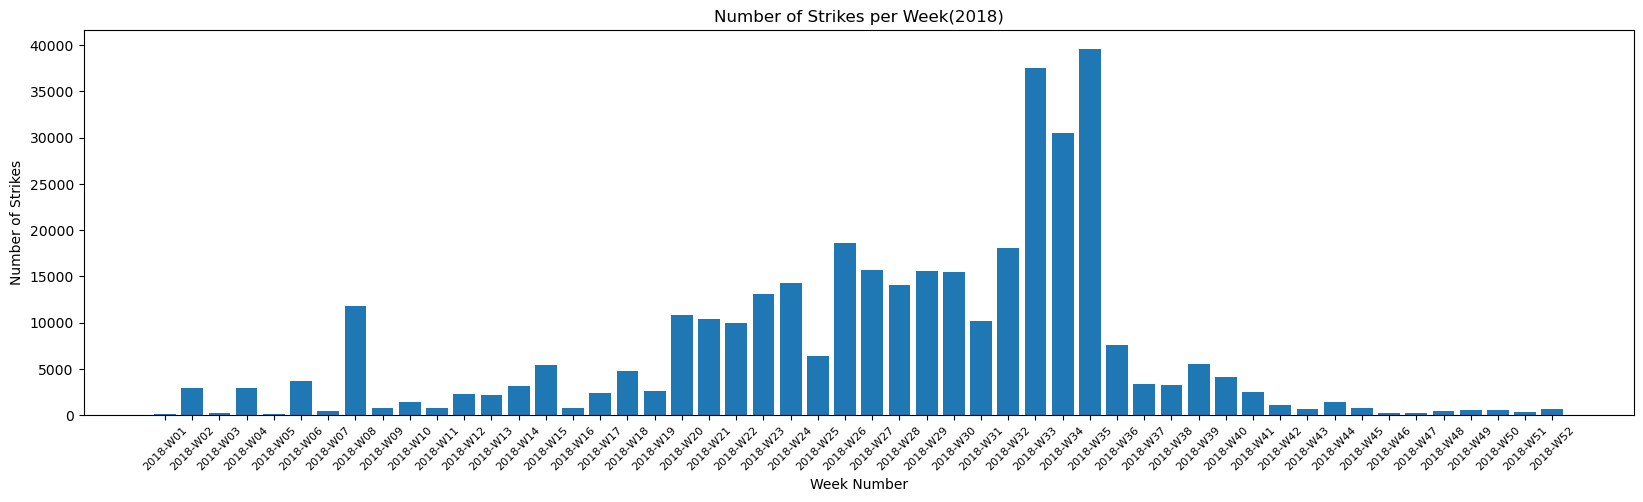

In [16]:
plt.figure(figsize = (20,5))   # Increase output size
plt.bar(df_by_week_2018['Week'], df_by_week_2018['number_of_strikes'])
plt.plot()
plt.xlabel('Week Number')
plt.ylabel('Number of Strikes')
plt.title('Number of Strikes per Week(2018)')
plt.xticks(rotation=45, fontsize=8)   # Rotate x-axis labels and decrease font size.
plt.show()

In [17]:
df_by_quarter = df.groupby(df['Quarter']).sum(numeric_only=True).reset_index()
df_by_quarter

,Quarter,number_of_strikes,x_coord,y_coord
0,2009-Q1,8857,-104448.2,40830.4
1,2009-Q2,94907,-700811.2,273423.5
2,2009-Q3,116772,-1031718.3,392561.4
3,2009-Q4,11953,-150275.5,54767.8
4,2012-Q1,16774,-197699.4,77639.1
5,2012-Q2,72297,-619665.3,244002.7
6,2012-Q3,117120,-1180423.5,436368.1
7,2012-Q4,11528,-185087.5,73476.0
8,2015-Q1,5935,-98693.8,35747.7
9,2015-Q2,116230,-952712.9,358672.8


In [18]:
def addlabels(x, y, labels):
    # Iterates over data and plots text labels above each bar of the bar graph.

    for i in range(len(x)):
        plt.text(i, y[i], labels[i], ha = 'center', va = 'bottom')

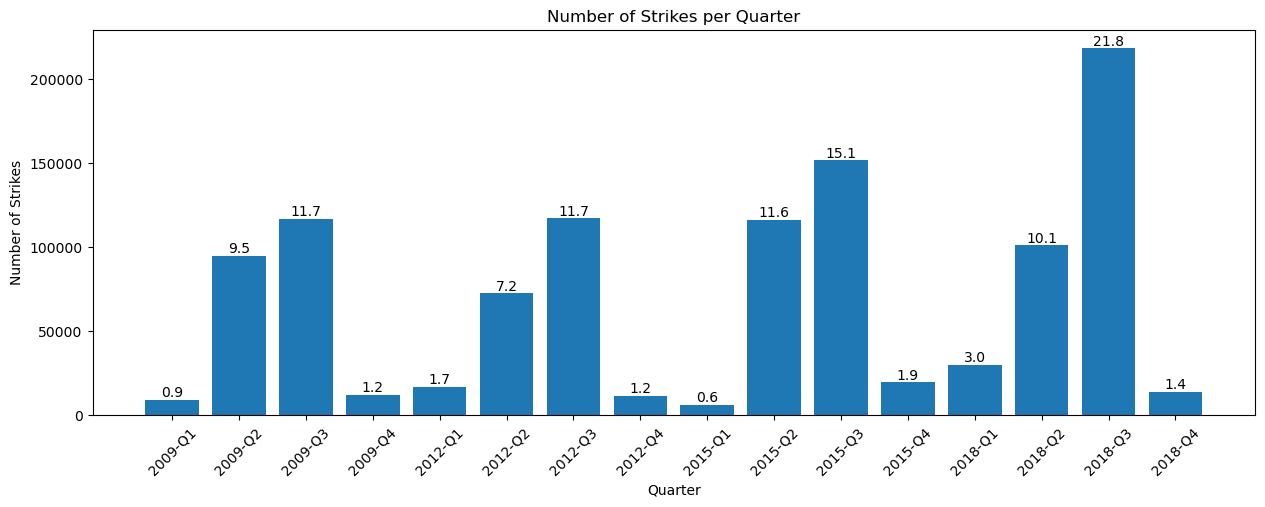

In [19]:
plt.figure(figsize=(15, 5))
plt.bar(df_by_quarter['Quarter'], df_by_quarter['number_of_strikes'])
addlabels(df_by_quarter['Quarter'], df_by_quarter['number_of_strikes'], (df_by_quarter['number_of_strikes']/10000).round(1))
plt.xlabel('Quarter')
plt.ylabel('Number of Strikes')
plt.title('Number of Strikes per Quarter')
plt.xticks(rotation=45, fontsize=10)
plt.show()

# Structuring

In [20]:
raw_data['Year'] = raw_data['date'].dt.strftime('%Y')

In [21]:
raw_data.head(), raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12875911 entries, 0 to 12875910
Data columns (total 5 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   number_of_strikes  int64         
 2   x_coord            float64       
 3   y_coord            float64       
 4   Year               object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 491.2+ MB


(        date  number_of_strikes  x_coord  y_coord  Year
 0 2012-09-15                  2    -68.8     49.5  2012
 1 2012-09-15                  2    -85.7     22.8  2012
 2 2012-09-15                  2    -95.6     25.8  2012
 3 2012-09-15                  2    -79.5     26.0  2012
 4 2012-09-15                  2    -88.7     29.1  2012,
 None)

### Filtering

In [22]:
df_2018 = raw_data[raw_data['Year'] == '2018']

In [23]:
df_2018

,date,number_of_strikes,x_coord,y_coord,Year
3125,2018-08-09,1,-68.0,36.0,2018
3126,2018-08-09,1,-78.7,18.4,2018
3127,2018-08-09,1,-78.1,18.4,2018
3128,2018-08-09,1,-74.5,47.0,2018
3129,2018-08-09,1,-70.4,47.0,2018
...,...,...,...,...,...
12814278,2018-12-03,30,-75.3,32.3,2018
12814279,2018-12-03,30,-75.8,31.3,2018
12814280,2018-12-09,30,-85.2,26.8,2018
12814281,2018-12-27,30,-96.4,31.2,2018


### Sorting

In [24]:
df_2018 = df_2018.sort_values(by=['number_of_strikes'], ascending=False)

In [25]:
df_2018

,date,number_of_strikes,x_coord,y_coord,Year
2726276,2018-08-20,2211,-92.5,35.5,2018
1436813,2018-08-16,2142,-96.1,36.1,2018
4011098,2018-08-17,2061,-90.2,36.1,2018
10452008,2018-08-17,2031,-89.9,35.9,2018
4010843,2018-08-16,1902,-96.2,36.1,2018
...,...,...,...,...,...
7730809,2018-08-09,1,-77.6,18.3,2018
7730808,2018-08-09,1,-71.0,36.0,2018
6962998,2018-08-09,1,-69.8,47.0,2018
6962997,2018-08-09,1,-69.5,35.0,2018


### Distribution of Data Points

In [26]:
print(df_2018['x_coord'].value_counts())
print(df_2018['y_coord'].value_counts())

x_coord
-81.8     11434
-81.7     11368
-81.6     11291
-81.9     11254
-82.0     11058
          ...  
-44.6         1
-44.4         1
-46.7         1
-43.7         1
-139.0        1
Name: count, Length: 1052, dtype: int64
y_coord
32.7    15174
32.2    15001
34.2    14950
32.6    14850
34.7    14844
        ...  
51.4        7
16.6        7
51.5        6
51.6        5
33.1        1
Name: count, Length: 681, dtype: int64


In [27]:
# sns.displot(df_2018['x_coord'], kde=True), sns.displot(df_2018['y_coord'], kde=True)

In [28]:
# df_2018['x_coord'].value_counts().loc[:20].rename_axis('unique_values').reset_index(name='counts').style.background_gradient()

((array([   863.,   9165., 124275., 590801., 813258., 860944., 757298.,
         182856.,  55803.,   5749.]),
  array([-141.8 , -131.94, -122.08, -112.22, -102.36,  -92.5 ,  -82.64,
          -72.78,  -62.92,  -53.06,  -43.2 ]),
  <BarContainer object of 10 artists>),
 (array([ 80651., 301026., 412211., 477388., 529688., 494538., 424116.,
         336949., 233583., 110862.]),
  array([16.6 , 20.11, 23.62, 27.13, 30.64, 34.15, 37.66, 41.17, 44.68,
         48.19, 51.7 ]),
  <BarContainer object of 10 artists>))

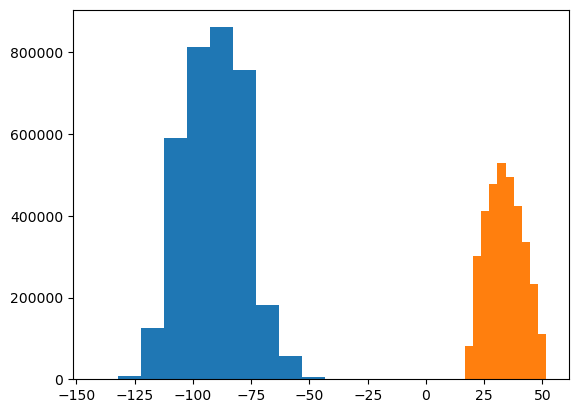

In [29]:
plt.hist(df_2018['x_coord']), plt.hist(df_2018['y_coord'])

In [30]:
print(df_2018.shape)
print(df_2018.drop_duplicates().shape)

(3401012, 5)
(3401012, 5)


### Grouping

In [31]:
df_2018['Week'] = df_2018['date'].dt.isocalendar().week
df_2018['Weekday'] = df_2018['date'].dt.day_name()
df_2018.head(10)

,date,number_of_strikes,x_coord,y_coord,Year,Week,Weekday
2726276,2018-08-20,2211,-92.5,35.5,2018,34,Monday
1436813,2018-08-16,2142,-96.1,36.1,2018,33,Thursday
4011098,2018-08-17,2061,-90.2,36.1,2018,33,Friday
10452008,2018-08-17,2031,-89.9,35.9,2018,33,Friday
4010843,2018-08-16,1902,-96.2,36.1,2018,33,Thursday
10425252,2018-02-10,1899,-95.5,28.1,2018,6,Saturday
10451723,2018-08-16,1878,-89.7,31.5,2018,33,Thursday
123269,2018-02-25,1833,-98.7,28.9,2018,8,Sunday
4011468,2018-08-17,1767,-90.1,36.0,2018,33,Friday
3985308,2018-02-25,1741,-98.0,29.0,2018,8,Sunday


In [32]:
# Calculate mean count of lightening strikes for each weekday.

# df_2018.groupby(by=['Weekday']).sum(numeric_only=True).drop(['x_coord', 'y_coord', 'Week'], axis=1).reset_index()

df_2018[['Weekday', 'number_of_strikes']].groupby(by=['Weekday']).mean().reset_index()

,Weekday,number_of_strikes
0,Friday,13.349972
1,Monday,13.152804
2,Saturday,12.732694
3,Sunday,12.324717
4,Thursday,13.240594
5,Tuesday,13.813599
6,Wednesday,13.224568


C:\Users\DeLL\AppData\Local\Temp\ipykernel_11580\1154417805.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.boxplot(data = df_2018,


Text(0.5, 1.0, 'Lightning distribution per weekday (2018)')

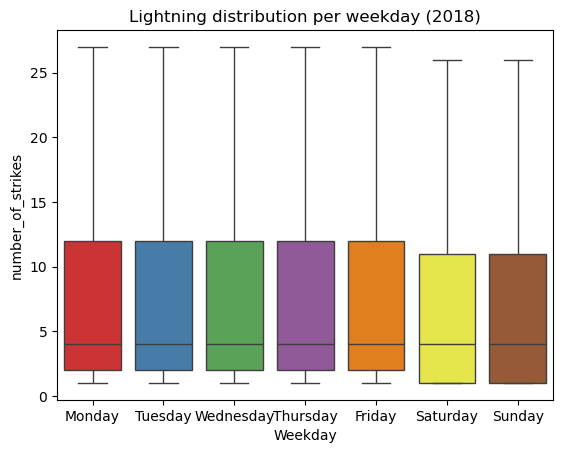

In [33]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

g = sns.boxplot(data = df_2018,
                x = 'Weekday',
                y = 'number_of_strikes',
                order = weekday_order,
                palette = 'Set1',       # Can also have values such as, Set2, Set3, Paired etc.
                showfliers = False
               );
g.set_title('Lightning distribution per weekday (2018)')

### Merging

# Cleaning

### Missing Values

In [34]:
df_2018['Month'] = df_2018['date'].dt.strftime('%m')
df_2018

,date,number_of_strikes,x_coord,y_coord,Year,Week,Weekday,Month
2726276,2018-08-20,2211,-92.5,35.5,2018,34,Monday,08
1436813,2018-08-16,2142,-96.1,36.1,2018,33,Thursday,08
4011098,2018-08-17,2061,-90.2,36.1,2018,33,Friday,08
10452008,2018-08-17,2031,-89.9,35.9,2018,33,Friday,08
4010843,2018-08-16,1902,-96.2,36.1,2018,33,Thursday,08
...,...,...,...,...,...,...,...,...
7730809,2018-08-09,1,-77.6,18.3,2018,32,Thursday,08
7730808,2018-08-09,1,-71.0,36.0,2018,32,Thursday,08
6962998,2018-08-09,1,-69.8,47.0,2018,32,Thursday,08
6962997,2018-08-09,1,-69.5,35.0,2018,32,Thursday,08


In [35]:
df_2018.to_csv('NOAA Lightning Strike (2018).csv')

In [36]:
new_df = pd.read_csv('NOAA Lightning Strike (2018).csv')
# df_2018_aug = new_df[new_df['Month'] == '8']
# df_2018_aug
new_df

,Unnamed: 0,date,number_of_strikes,x_coord,y_coord,Year,Week,Weekday,Month
0,2726276,2018-08-20,2211,-92.5,35.5,2018,34,Monday,8
1,1436813,2018-08-16,2142,-96.1,36.1,2018,33,Thursday,8
2,4011098,2018-08-17,2061,-90.2,36.1,2018,33,Friday,8
3,10452008,2018-08-17,2031,-89.9,35.9,2018,33,Friday,8
4,4010843,2018-08-16,1902,-96.2,36.1,2018,33,Thursday,8
...,...,...,...,...,...,...,...,...,...
3401007,7730809,2018-08-09,1,-77.6,18.3,2018,32,Thursday,8
3401008,7730808,2018-08-09,1,-71.0,36.0,2018,32,Thursday,8
3401009,6962998,2018-08-09,1,-69.8,47.0,2018,32,Thursday,8
3401010,6962997,2018-08-09,1,-69.5,35.0,2018,32,Thursday,8


In [37]:
df_2018_aug = new_df[new_df['Month'] == 8].drop(['Unnamed: 0'], axis=1)
df_2018_aug

,date,number_of_strikes,x_coord,y_coord,Year,Week,Weekday,Month
0,2018-08-20,2211,-92.5,35.5,2018,34,Monday,8
1,2018-08-16,2142,-96.1,36.1,2018,33,Thursday,8
2,2018-08-17,2061,-90.2,36.1,2018,33,Friday,8
3,2018-08-17,2031,-89.9,35.9,2018,33,Friday,8
4,2018-08-16,1902,-96.2,36.1,2018,33,Thursday,8
...,...,...,...,...,...,...,...,...
3401007,2018-08-09,1,-77.6,18.3,2018,32,Thursday,8
3401008,2018-08-09,1,-71.0,36.0,2018,32,Thursday,8
3401009,2018-08-09,1,-69.8,47.0,2018,32,Thursday,8
3401010,2018-08-09,1,-69.5,35.0,2018,32,Thursday,8


In [38]:
df_2018_aug.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717530 entries, 0 to 3401011
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   date               717530 non-null  object 
 1   number_of_strikes  717530 non-null  int64  
 2   x_coord            717530 non-null  float64
 3   y_coord            717530 non-null  float64
 4   Year               717530 non-null  int64  
 5   Week               717530 non-null  int64  
 6   Weekday            717530 non-null  object 
 7   Month              717530 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 49.3+ MB


### Outliers

In [39]:
raw_data.head()

,date,number_of_strikes,x_coord,y_coord,Year
0,2012-09-15,2,-68.8,49.5,2012
1,2012-09-15,2,-85.7,22.8,2012
2,2012-09-15,2,-95.6,25.8,2012
3,2012-09-15,2,-79.5,26.0,2012
4,2012-09-15,2,-88.7,29.1,2012


In [40]:
df = raw_data[['number_of_strikes', 'Year']].groupby(by=['Year']).sum()

In [41]:
df

,number_of_strikes
Year,
2009,30100585
2012,28807552
2015,37894191
2018,44600989


In [45]:
def readable_numbers(x):
    '''Takes a large number and formats it into K,M to make it more readable'''
    if x >= 1e6:
        s = '{:1.1f}M'.format(x*1e-6)
    else:
        s = '{:1.0f}K'.format(x*1e-3)
    return s

# Use the readable_numbers() function to create a new column.
df['number_of_strikes_readable'] = df['number_of_strikes'].apply(readable_numbers)

In [46]:
df.head(10)

,number_of_strikes,number_of_strikes_readable
Year,,
2009,30100585,30.1M
2012,28807552,28.8M
2015,37894191,37.9M
2018,44600989,44.6M
